<a href="https://colab.research.google.com/github/edmarja/projects-datascience/blob/main/Estudio_caso_habitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Escenario**
Deseando poner a prueba tus habilidades en tu día a día, decides analizar tus hábitos de gastos en comida (tomando datos de tus extractos bancarios) y tus patrones de sueño (tomando datos de una aplicación que hace un seguimiento de las horas totales de sueño reparador por noche) durante el año pasado.
Te descargas los extractos bancarios y recopilas los datos de sueño de la aplicación. Escribes un script de preprocesamiento de datos en Python que hace lo siguiente:
* Carga las transacciones de los extractos bancarios y los datos del sueño de la aplicación.
* Recorre en bucle las transacciones y clasifica cada una de ellas como servicio de entrega, comer fuera, cafetería, u otras.
* Calcula diariamente las compras totales para cada categoría.
* Fusiona los datos de sueño con las compras totales por día.
* Genera el archivo personal_data.xlsx con las siguientes columnas:
 - ``'date'`` — la fecha
 - ``'week_of_year'`` — semana del año de 1 a 52
 - ``'delivery'``— dinero empleado en servicio de entrega
 - ``'eating_out'`` — dinero empleado en comer fuera
 - ``'coffee_shops'`` — dinero empleado en cafeterías
 - ``'sleep_hours'`` — horas de sueño reparador
 
Es hora de escribir tu script de análisis y descubrir patrones sobre ti mismo.

In [ ]:
import pandas as pd

In [ ]:
daily_data = pd.read_excel('personal_data.xlsx')

print(daily_data.head(10))
print()
daily_data.info()

        date  week_of_year  delivery  eating_out  coffee_shops  sleep_hours
0 2019-01-01             1     11.55        0.00          0.00          7.4
1 2019-01-02             1      0.00       17.62          0.00          7.4
2 2019-01-03             1     12.74        0.00          0.00          7.8
3 2019-01-04             1      0.00       22.45          4.27          7.9
4 2019-01-05             1     16.01       17.69          0.00          7.3
5 2019-01-06             1     12.00        0.00          5.45          7.6
6 2019-01-07             1     13.49       20.96          0.00          7.6
7 2019-01-08             2     15.85        0.00          0.00          7.6
8 2019-01-09             2      0.00       19.37          0.00          7.2
9 2019-01-10             2      0.00       18.61          0.00          7.6

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ----

Un diagrama de contenedores hexagonales es la gráfica que mejor se adpata ala pregunta ``¿Cuánto dinero es probable que gaste en el servicio de entrega y en salir a comer fuera?``, por dos razones:
- Tienes dos variables (comer fuera y servicio de entrega) y te interesa su distribución conjunta.
- Quieres saber cuán probable es algo. Cuando hablamos de probabilidad, necesitas contar el número de sucesos o frecuencias. Solo un diagrama de contenedores hexagonales muestra las frecuencias de una distribución conjunta.

Para responder a la pregunta ``"¿Cuánto dinero es probable que gaste en el servicio de entrega y en salir a comer fuera?"``, crea un diagrama de ``contenedores hexagonales`` con 'delivery' en el eje X. Configura el tamaño de la cuadrícula en 8.

<AxesSubplot: xlabel='delivery', ylabel='eating_out'>

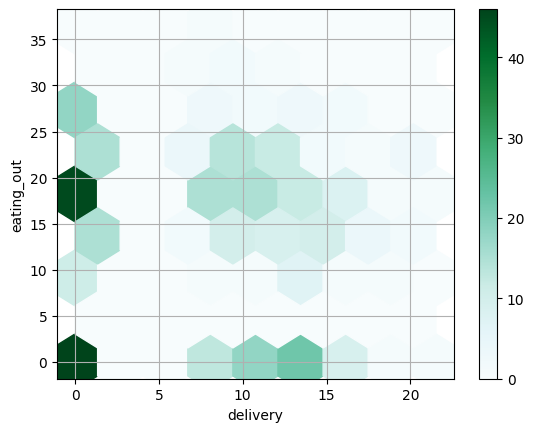

In [ ]:
#un histograma solo muestra la frecuencia de una sola variable pero como tenemos dos: delivery y eating_out; es mejor un gráfico hexagonal
daily_data.plot(x='delivery', y='eating_out', kind='hexbin', gridsize=8, sharex=False, grid=True)

Observamos ceros en los datos. Esto tiene sentido ya que no todos los días sales a comer fuera, pides servicio de entrega ni vas a una cafetería.

Sin embargo, estos ceros están alterando tu análisis. Para abordar este asunto, decides analizar los totales semanales en vez de los totales diarios.

Crea una tabla dinámica de totales semanales. Después, crea gráficos de caja de las columnas de tu tabla para ver si los valores 0 siguen siendo un problema.

In [ ]:
#creamos la tabla dinámica con los totales semanales
weekly_total = daily_data.pivot_table(index='week_of_year', aggfunc='sum')
weekly_total.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11124\725499599.py:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  weekly_total = daily_data.pivot_table(index='week_of_year', aggfunc='sum')


,coffee_shops,delivery,eating_out,sleep_hours
week_of_year,,,,
1,9.72,65.79,78.72,53.0
2,6.94,56.41,78.65,52.4
3,13.94,53.47,77.41,50.9
4,14.32,55.60,90.99,50.5
5,17.25,56.23,89.16,52.2


<AxesSubplot: >

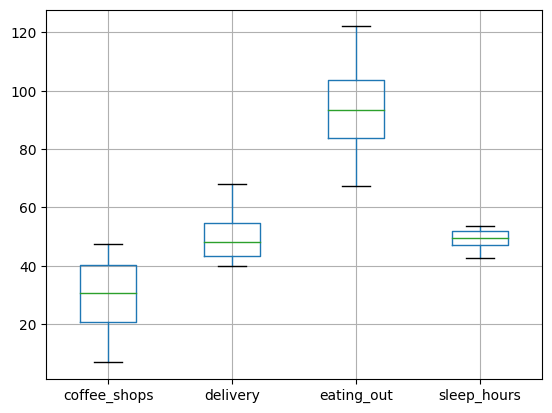

In [ ]:
#hacemos el gráfico de caja
weekly_total.boxplot()

De gráfico de caja se observa que al menos una vez por semana sales a comer fuera, pides servicio de entrega (delivery) y vas a cafeterías. De lo contratio habría un valor mínimo de cero.

<AxesSubplot: xlabel='delivery', ylabel='eating_out'>

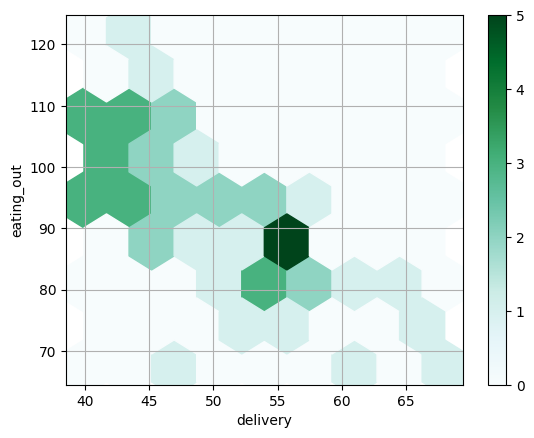

In [ ]:
#hacemos el gráfico hexagonal nuevamente
weekly_total.plot(x='delivery', y='eating_out', kind='hexbin', gridsize=8, sharex=False, grid=True)

Del gráfico. Parece que es probable que te gaste 55$ en servicios de entrega y 90$ en comer fuera en una determinada semana. También hay un gran cambio entre 40 y 45$ en servicios de entrega y 90 y 110$ en comer fuera en una determinada semana.

--- 
![image.png](attachment:image.png)

---

![image.png](attachment:image.png)

Ahora quieres saber si la cantidad que empleas en los servicios de entrega son constantes durante el año. Para empezar a investigar, calcula el coeficiente de correlación entre la semana del año y el servicio de entrega.

**En este momento, 'week_of_year' es el índice de weekly_total. Necesitas convertirlo en una columna antes de poder calcular el coeficiente de correlación.**

In [ ]:
#cambiamos el indice week_of_year a columna
weekly_total = weekly_total.reset_index('week_of_year')
weekly_total.head()

,week_of_year,coffee_shops,delivery,eating_out,sleep_hours
0,1,9.72,65.79,78.72,53.0
1,2,6.94,56.41,78.65,52.4
2,3,13.94,53.47,77.41,50.9
3,4,14.32,55.60,90.99,50.5
4,5,17.25,56.23,89.16,52.2


In [ ]:
#ahora calculamos la correlación
weekly_total.week_of_year.corr(weekly_total.delivery)

-0.007693717597421772

![image.png](attachment:image.png)

Si trazas ``'week_of_year'`` versus ``'delivery'``, no esperes un patrón lineal. ¿Pero habrá algún patrón? ¿Podría parecer ruido? Solo hay una forma de averiguarlo...

Haz un gráfico de dispersión con ``'week_of_year'`` en el eje X y ``'delivery'``en el eje Y.

<AxesSubplot: xlabel='week_of_year', ylabel='delivery'>

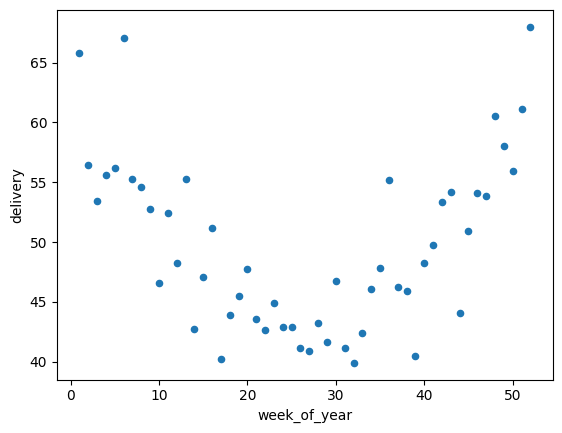

In [ ]:
weekly_total.plot(x='week_of_year', y='delivery', kind='scatter')

Definitivamente hay una relación pero no es lineal. Parece ser que pides más servicios de entrega durante los meses de verano y menos durante los meses de invierno.

Veamos qué otros tipos de relaciones existen entre las variables.

Crea una matriz de dispersión de los datos de los totales semanales. Establece el tamaño de la figura en 15 por 10 pulgadas.

In [ ]:
import matplotlib.pyplot as plt

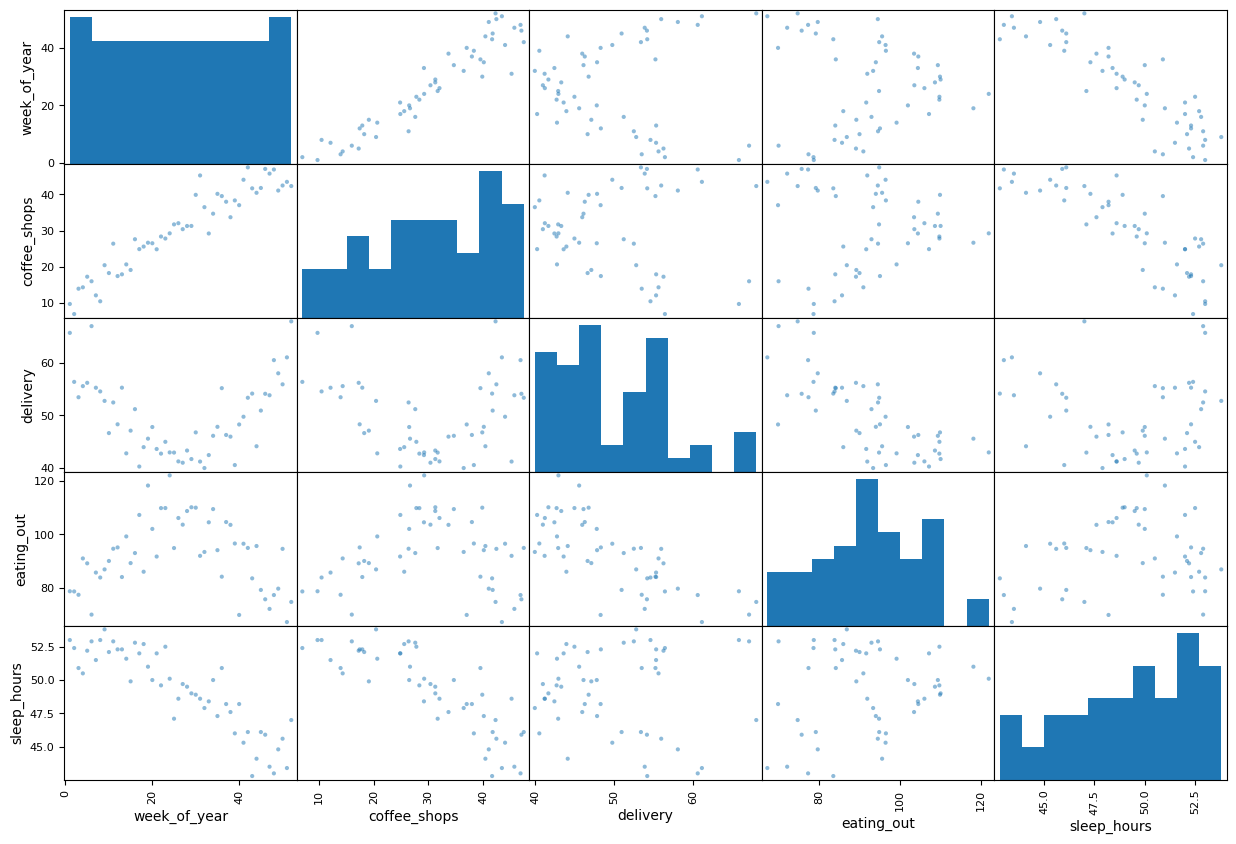

In [ ]:
pd.plotting.scatter_matrix(weekly_total, figsize=(15,10))
plt.show()

![image.png](attachment:image.png)

![image.png](attachment:image.png)

Puedes verificar las respuestas de las preguntas anteriores calculando los coeficientes de correlación para todas las combinaciones por pares.

In [ ]:
weekly_total.corr()

,week_of_year,coffee_shops,delivery,eating_out,sleep_hours
week_of_year,1.000000,0.945443,-0.007694,-0.086315,-0.883275
coffee_shops,0.945443,1.000000,-0.096432,-0.003027,-0.830464
delivery,-0.007694,-0.096432,1.000000,-0.727495,-0.059423
eating_out,-0.086315,-0.003027,-0.727495,1.000000,0.185980
sleep_hours,-0.883275,-0.830464,-0.059423,0.185980,1.000000


Se observa que week_of_years y coffee_shops tienen el mayor valor positivo y week_of_years y sleep_hours el mayor valor negativo.

Hay mucho conocimiento que extraer de las matrices de dispersión y correlación, como la relación negativa entre comer fuera y el servicio de entregas, o cómo comes fuera más veces durante los meses de verano, o cómo la cantidad de dinero que empleas en las cafeterías está correlacionada negativamente con las horas de sueño reparador que consigues (a lo mejor deberías dejar de lado la cafeína). Echemos un vistazo a una más correlación más que es interesante.

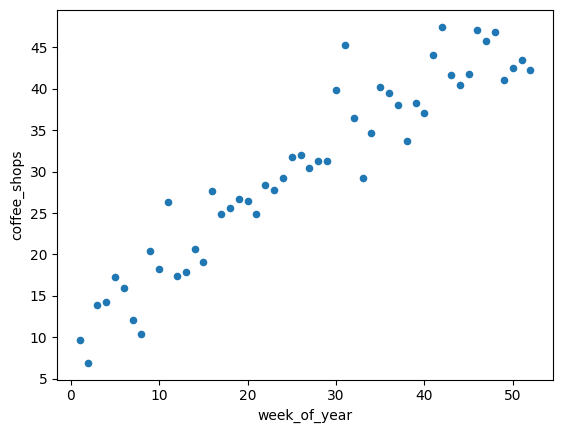

In [ ]:
#graficamos semanas vs coffee_shops
weekly_total.plot(x='week_of_year', y='coffee_shops', kind='scatter')
plt.show()

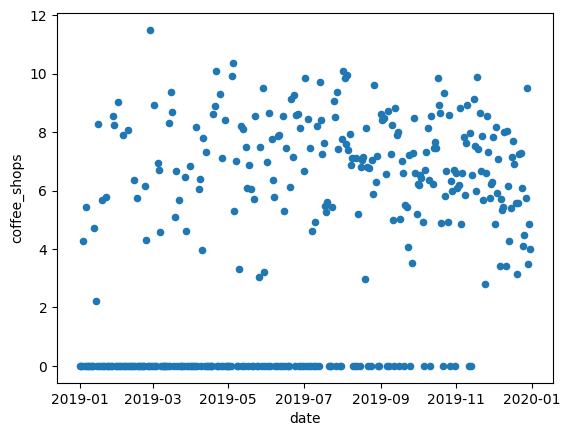

In [ ]:
#graficamos fechas vs coffee_shops
daily_data.plot(x='date', y='coffee_shops', kind='scatter')
plt.show()

Agregar datos puede tener extraños efectos que podrían confundirte si no los entiendes. Si miras a los dos gráficos de dispersión, puedes ver una fuerte relación lineal positiva en uno y casi ninguna relación en el otro.

El gráfico de dispersión de los datos diarios indica que la cantidad que empleas en cafeterías ha sido constante durante el año: has gastado aproximadamente de $3 a 10 dólares en cada visita.

Lo que es inconsistente es el número de veces por semana que visitas la cafetería. En los datos diarios, hay menos puntos al principio del año y más puntos al final del año. Si miras a los valores 0, verás más valores 0 hacia el principio del año y menos hacia el final. De hecho, gastas dinero en las cafeterías todos los días a final de año.

No es que estés gastando más dinero cada vez que vas a una cafetería, sino que vas con mayor frecuencia. Por eso los totales semanales muestran una fuerte relación lineal positiva mientras que los datos diarios no lo hacen.